# **Notebook de Análise de Dados de Saúde**
**SEU NOME:** -- Marcos Melo --

Fonte dos dados: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# **Atividade Prática:**


1.   Você deve encontrar as celulas de texto que solicitem a explicação da célula ou conjunto de células logo abaixo delas e fazer uma explicação sucinta daquele trecho de código. Você pode fazer um comentário nas celulas principais.
2.   Você deve corrigir os erros nas células que apresentaram erros. Utilize o "Explain Error"





🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

> Importam o csv e verificam se existem dados nulos em alguma coluna



In [ ]:
# Importa csv
data = pd.read_csv("/content/sample_data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# verifica se tem dados vazios (null)
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

  Elas servem para transformar as variáveis categóricas em variáveis numéricas


In [ ]:
from sklearn.preprocessing import LabelEncoder

#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

#smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

#Region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)



In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

  Primeiro é feita uma classificação em ordem crescente das correlações entre as variáveis "data" e a coluna "charges"
  
  Depois é criado um mapa de calor dessas correlações


In [ ]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

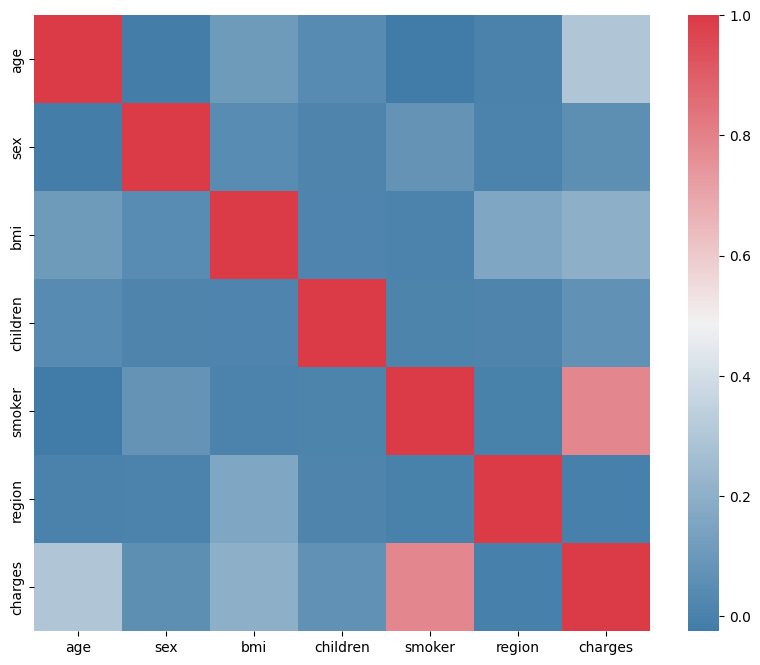

In [ ]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)
f, ax = pl.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

O primeiro deverias ser um histograma de "charges" no dataframe "data"


O segundo é um gráfico que traça a distribuição de cargas(charges) para fumantes e não fumantes


O terceiro é um gráfico de contagem de fumantes e não fumantes separados por gênero


In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'

# Wrap the 'p' figure in a list
show(gridplot([p], ncols=2, toolbar_location=None))

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

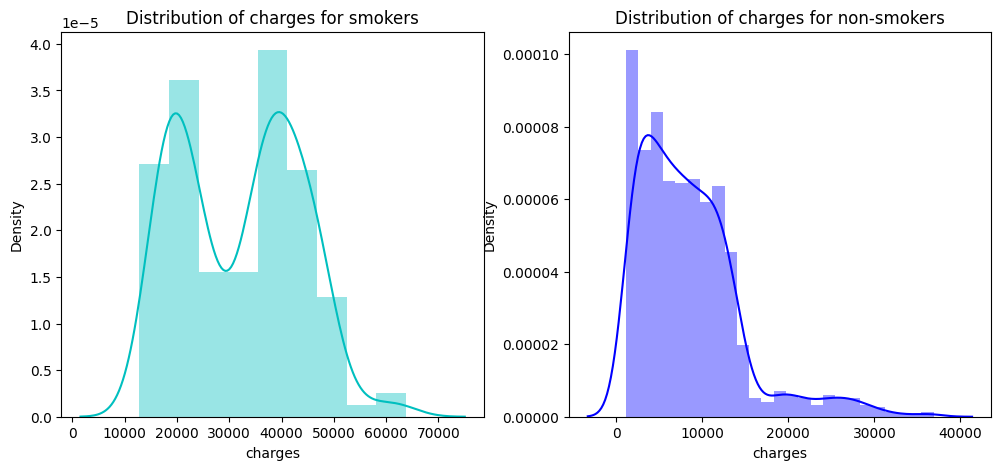

In [ ]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

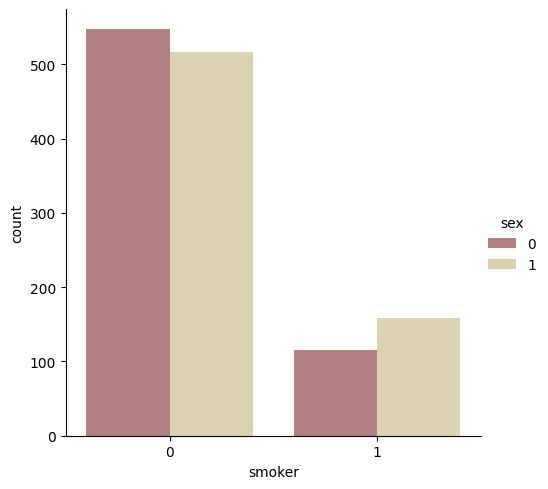

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

O primeiro é um box plot de "charges" das mulheres


O segundo é a mesma coisa do primeiro só que para homens


O terceiro é um gráfico que mostra a distribuição de idade no dataframe


O quarto gráfico mostra uma contagem de fumantes e não fumantes específico para pessos com 18 anos


O quinto é o box plot para fumantes com 18 anos


<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

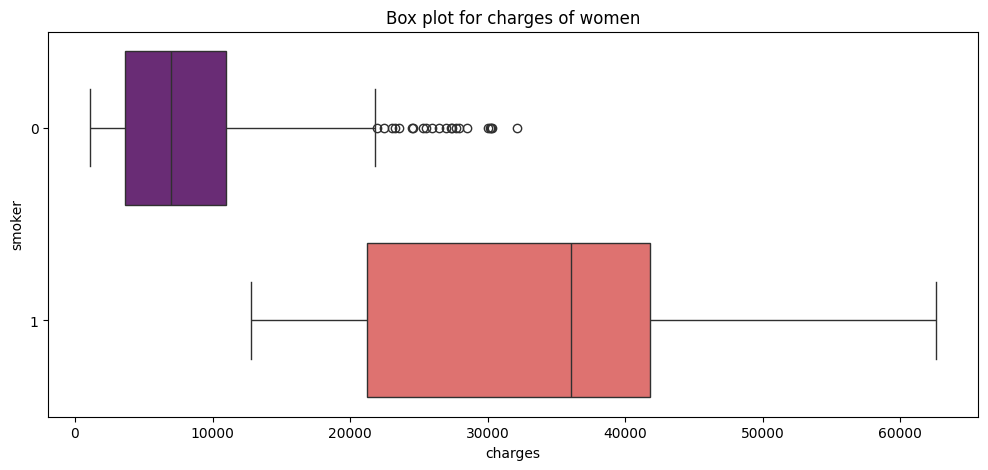

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

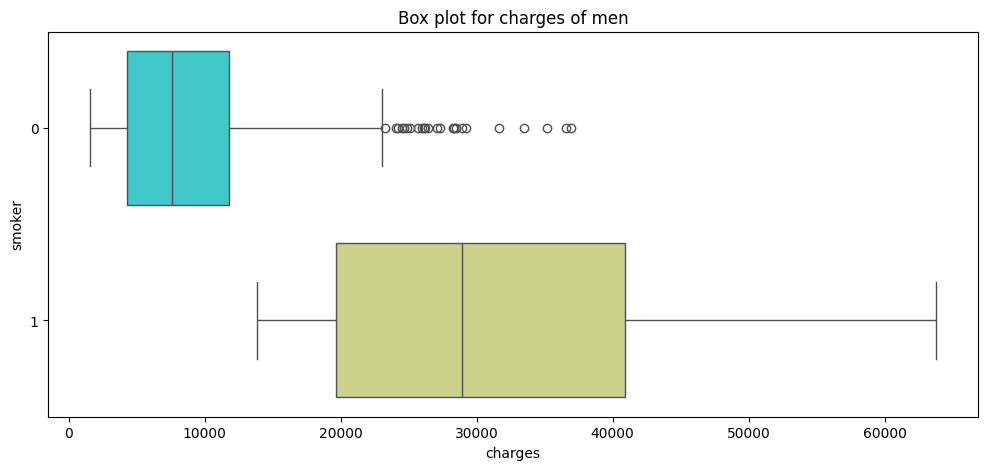

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

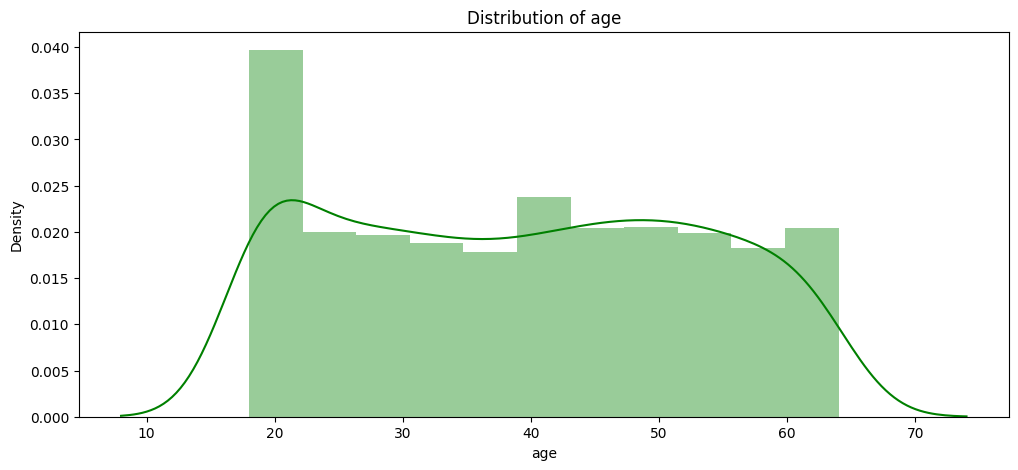

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

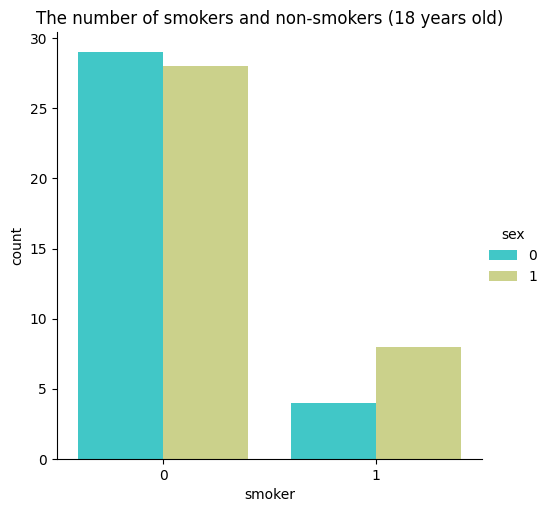

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

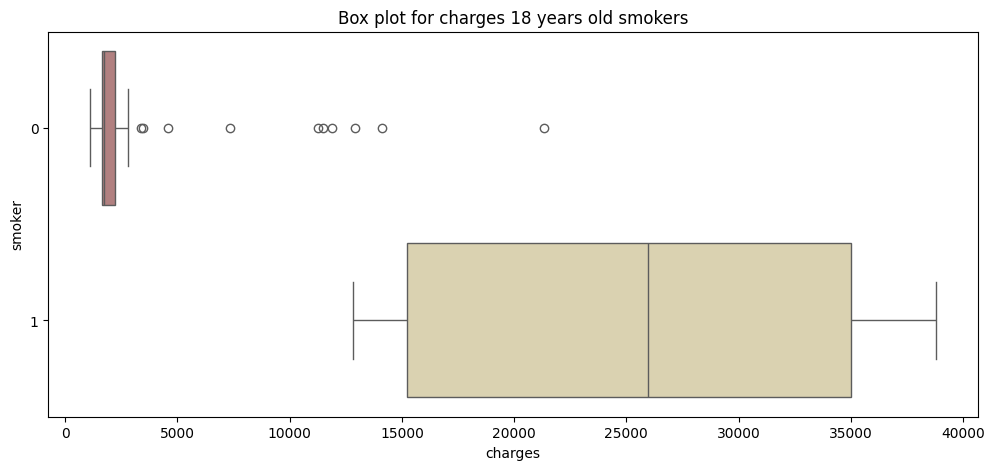

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

Basicamente os códigos fornecem uma variedade de visualizações para idade, "charges" e status de fumante



Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

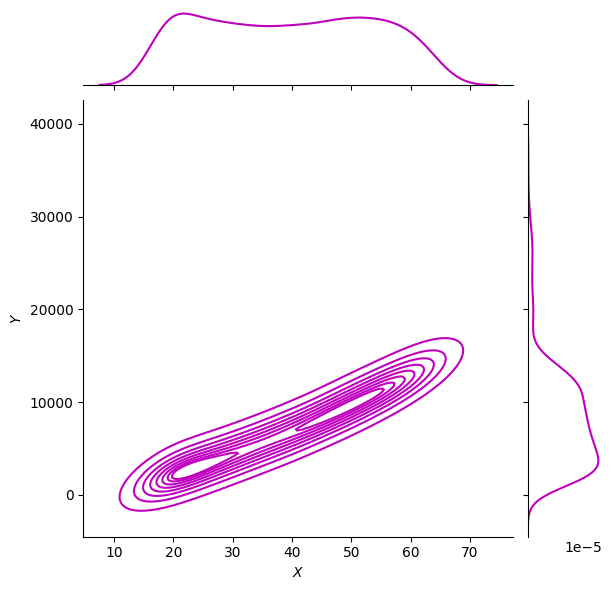

In [ ]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

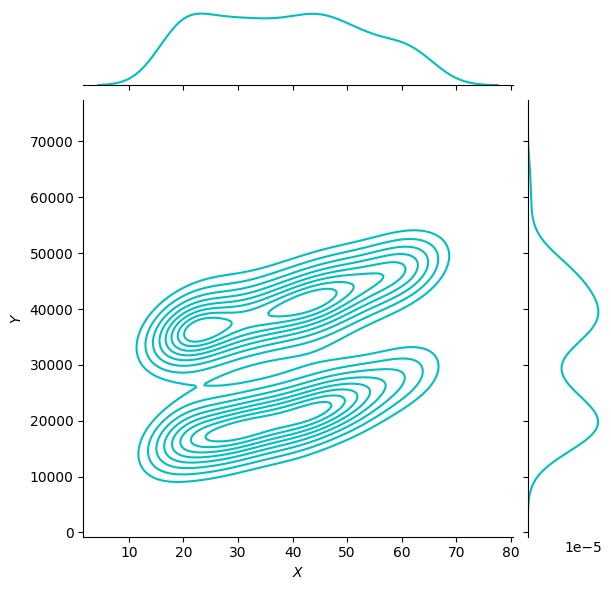

In [ ]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [ ]:
#non - smokers
p = figure(width=500, height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [ ]:
#smokers
p = figure(width=500, height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

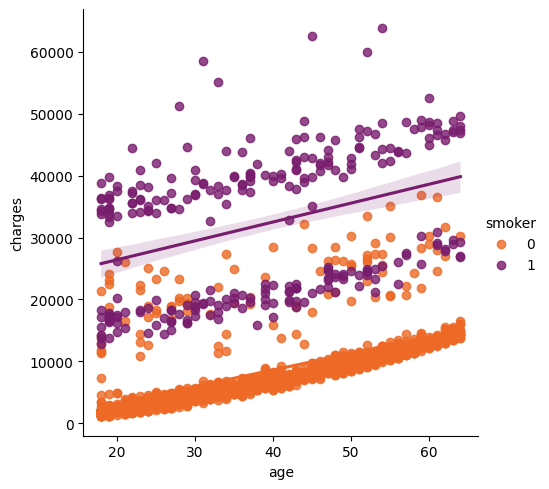

In [ ]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette='inferno_r')
ax.set_title('Smokers and non-smokers')

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

Os códigos continuam a fornecer conjuntos de dados com visualizações adicioais

Exemplo: Distribuição de BMI, relação entre cargas e BMI


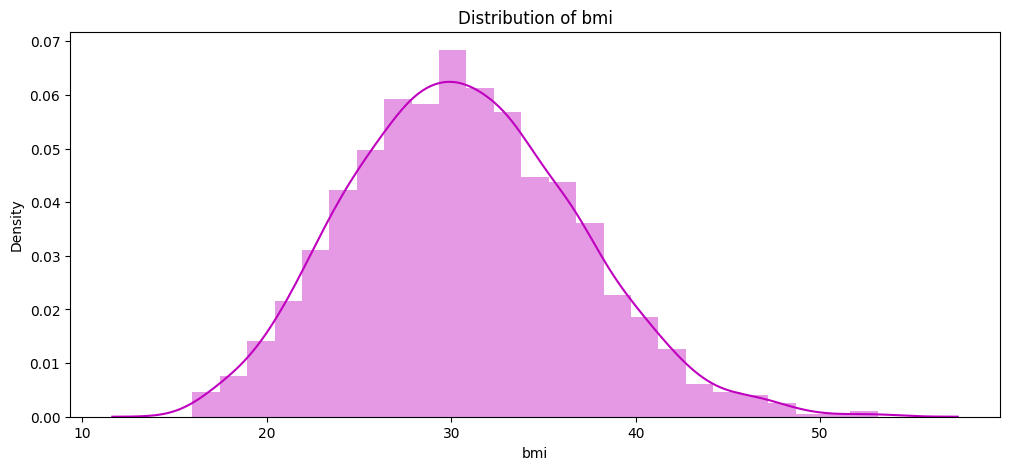

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

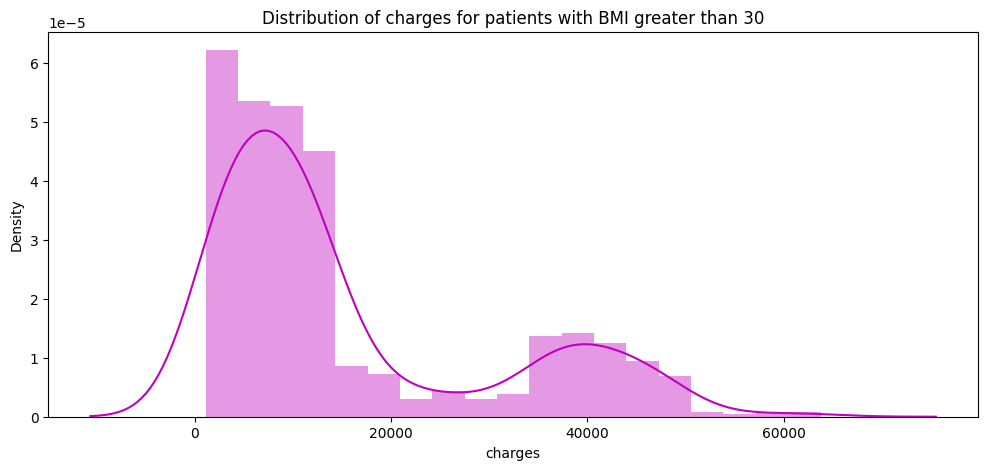

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

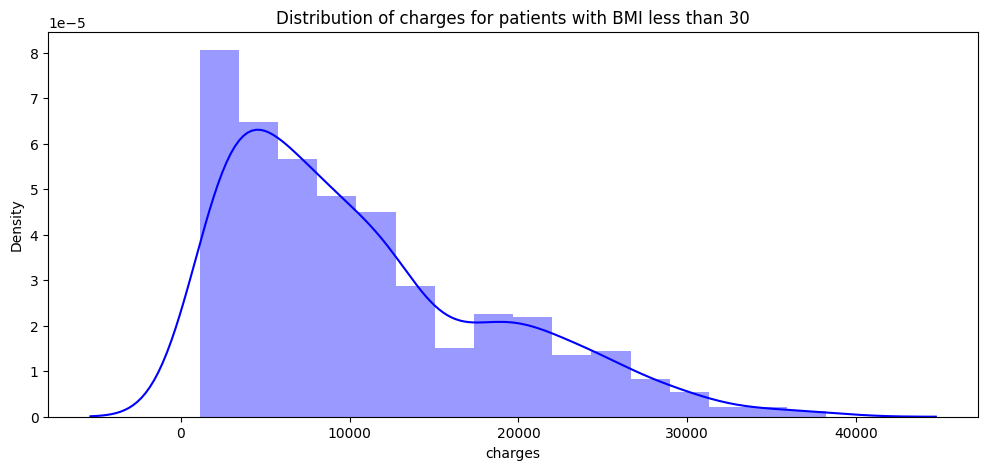

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

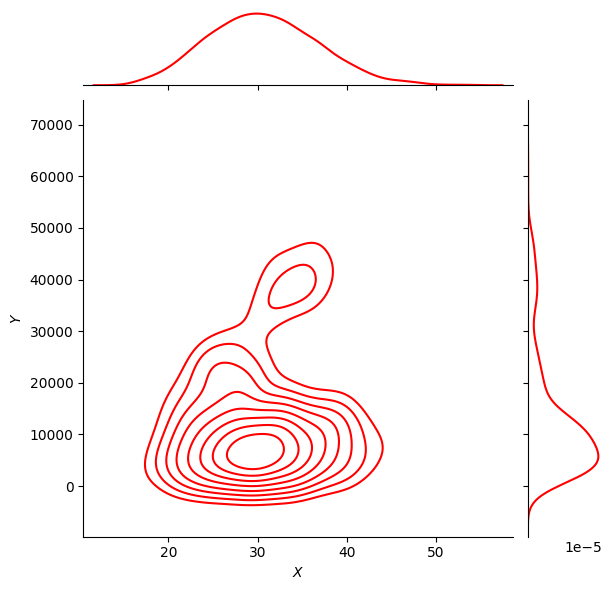

In [ ]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

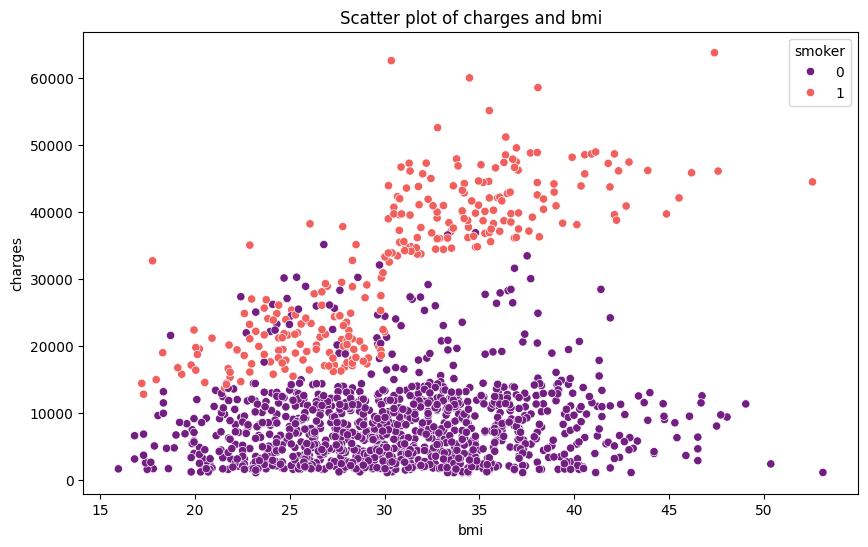

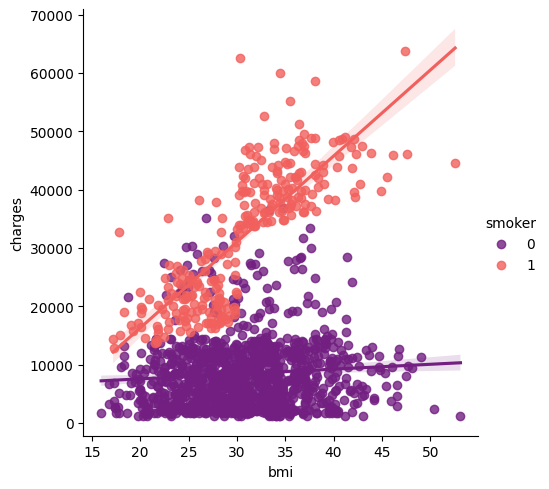

In [ ]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma')

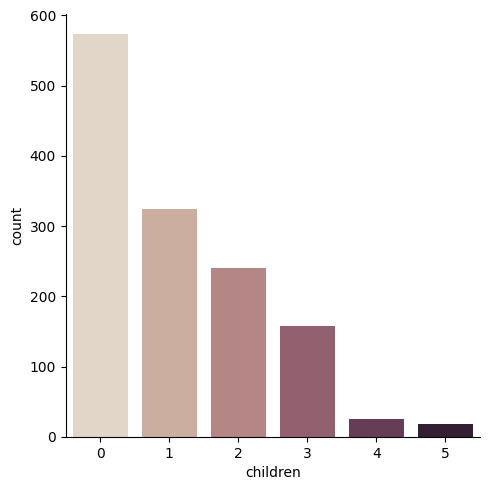

In [ ]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

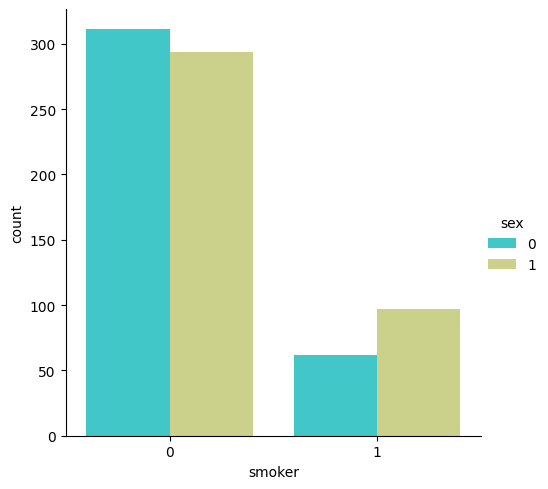

In [ ]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)])
ax.set_title('Smokers and non-smokers who have childrens')

# ⏺⏺⏺⏺⏺ **INÍCIO MACHINE LEARNING** ⏺⏺⏺⏺⏺

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

É realizada uma modelagem preditiva com regressão linea. É imprimido no final a pontuação R² do modelo de regressão linear.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

É utilizado agora na modelagem preditiva a regressão polinomial e o RandomForest, talvez para calcular qual se sairia melhor. No final, um gráfico de dispersão é plotado para mostrar a diferença entre os valores previstos



In [ ]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147227


In [ ]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',  # Changed 'mse' to 'squared_error'
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3746684.434, MSE test data: 19965476.411
R2 train data: 0.974, R2 test data: 0.873


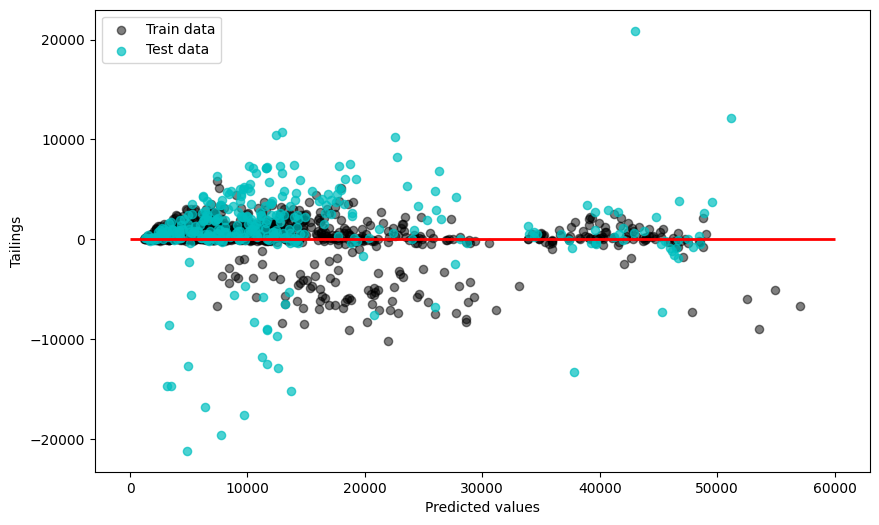

In [ ]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()